**Instituto de Informática - UFG**

Disciplina: Inteligência Artificial

Prof. Cedric Luiz de Carvalho

Grupo número ( E  )

---


Aluno:  Leonardo Moraes Fleury

---

Aluno: Tallis Marques

---

Aluna: Thaynara Mábille Marques Ribeiro


---

#Especificação do problema : Árvores de Decisão

A partir da base de dados disponibilizada anteriormente, induzir uma árvore de decisão que correlacione o desempenho nos dois primeiros períodos do curso com um bom desempenho final e permita fazer previsões sobre o desempenho final de novos alunos.

Para isso, considere:


1.  Um aluno com bom desempenho é aquele que se forma em até 4 anos ou se forma com média igual ou superior a 7 ou  se forma com número de reprovações igual inferior a 5.

2. Para o treinamento do modelo, considere apenas as disciplinas dos dois primeiros períodos do curso.

3. Escolher pelo menos um dos seguintes algoritmos para a implementação: ID3, C4.5 e CART.

4. Para visualização das árvores de decisão geradas, utilize o [graphviz](https://towardsdatascience.com/interactive-visualization-of-decision-trees-with-jupyter-widgets-ca15dd312084).


**Observação 1**: Poderão ser utilizados códigos de outros autores, desde que sejam feitos ou devidos créditos aos mesmos. Esses códigos devem ser devidamente comentados.

**Observação 2**: O trabalho deve ser feito em grupo, mas a avaliação será feita individualmente. Para isso, o grupo deverá fazer um planejamento/cronograma de trabalho e o trabalho de cada membro deverá ser devidamente identificado (por meio de** ##NomeDoAluno**)


#Planejamento de atividades

O grupo deverá listar aqui as atividades a serem desenvolvidas e os responsáveis por elas

1. Estudo e entendimento da base de dados (Todos)
2. Estudo e entendimento do problema a ser resolvido (Todos)
3. Planejamento das atividades (Thaynara)
4. Limpeza da base de dados (Leonardo e Tallis)
  - Implementação (Leonardo)
  - Estudo de exemplos parecidos (Tallis)
5. Descrição do modelo (Thaynara)
6. Implementação do modelo (Leonardo)
7. Avaliação dos resultados (Thaynara)
9. Avaliação do modelo (Thaynara)
89. Treinamento do conjunto de dados (Tallis)
8. Geração de graficos (Tallis)







#Mural de trabalho

Neste campo, o grupo deverá registrar todas as interações realizadas. Cada anotação deve ser devidamente identificada por **@NomeDoAluno**).

@Thaynara: Qual as colunas ficaram?

@Leonardo: Sobrou estas colunas:
```
'id', 'ano_periodo_ingresso', 'ano_periodo_inativacao', 'media_global_atual_discente', 'codigo_componente', 'semestre_previsto_componente', 'nota_discente_componente', 'situacao_discente_componente', 'quantidade_reprovacoes_nc', 'quantidade_reprovacoes_nl', 'quantidade_reprovacoes_neobr'
```
Acho que com isso dá pra fazer tudo o que precisamos.

@Leonardo: depois reduzi as colunas para: `conclui_tempo, boa_media, poucas_reprovacoes,	IME0073,	INF0131,	INF0135,	IFI0105,	IME0006,	IME0078,	INF0157,	INF0195,	INF0109,	INF0156`

-----
@Leonardo: O que acham de usarmos esse formato para os dados?
```
{
  1: {
      'tempo_conclusao': 7.0,
      'media_global': 5.01,
      'reprovacoes': 25,
      'materias': {
        'IME0073': {'nota': 7.3, 'tentativas': 1},
        ...
        }
    },
    ...
}
```

@Leonardo: acabei mudando os planos e fiz como o monitor sugeriu mesmo, ficou no formato:

|   |conclui_tempo|boa_media|poucas_reprovacoes|IME0073|...|INF0157|INF0195|INF0109|INF0156|
|---|-------------|---------|------------------|-------|---|-------|-------|-------|-------|
|1  |True         |True     |True              |8.0    |...|6.0    |8.0    |-1.0   |-1.0   |

Sendo o valor -1.0 como não cursou

-----

@Thaynara: Não seria interessante definirnos o id do aluno para cada formato desses dados?


@Thaynara: vamos dividir em 80% pra treino e 20% pra teste ne?

@tallis: sim

# Descrição do modelo

O grupo deverá descrever o modelo a ser implementado e o conjunto de treino.

A proposta foi incorporada como sendo um problea de classificação tendo uma solução usando árvore de decisão baseada no algoritmo ID3. 

Foram selecionados os atributos da base de dados que se acredita poder apresentar maior influência no prazo final de formação do aluno, dentre eles estão: 

- **id**: identificação do aluno
- **ano_periodo_ingresso**: Ano e período em que o aluno se ingressou.
- **ano_periodo_inativacao**: Ano e período em que o aluno concluiu.
- **media_global_atual_discente**: Média global do aluno.
- **codigo_componente**: Código da disciplina.
- **semestre_previsto_componente**: Qual semestre em que a disciplina foi cursada.
- **nota_discente_componente**: Nota do aluno na disciplina cursada.
- **situacao_discente_componente**: Situação do aluno na disciplina (Aprovado, Reprovado)
- **quantidade_reprovacoes_nc**: Quantidade de reprovações que o aluno teve em disciplinas de núcleo comum.
- **quantidade_reprovacoes_nl**:  Quantidade de reprovações que o aluno teve em disciplinas de núcleo livre.
- **quantidade_reprovacoes_neobr**:  Quantidade de reprovações que o aluno teve em disciplinas de núcleo obrigatorio.


Dentro os dados foi-se analisado aqueles dos alunos que ja cursaram alguma disciplina do 1° e 2° período.

Os dados foram colocados no formato:

|   |conclui_tempo|boa_media|poucas_reprovacoes|IME0073|...|INF0157|INF0195|INF0109|INF0156|
|---|-------------|---------|------------------|-------|---|-------|-------|-------|-------|
|1  |True         |True     |True              |8.0    |...|6.0    |8.0    |-1.0   |-1.0   |

Sendo o valor -1.0 como não cursou

O conjunto de dados foi dividido  em 80% para treino e 20% para teste. Onde após o treinamento da árvore, o algoritmo de classificação foi executado sobre o conjunto de testes e o numero de acertos foi computado.


#Implementação

In [0]:
# importando as bibliotecas
import math
import pandas as pd
import numpy as np
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff

In [0]:
# subindo a base de dados
from google.colab import files
uploaded = files.upload()

Saving baseDeDados.csv to baseDeDados (2).csv


In [0]:
import math

################################################################################
#                   Lendo e convertendo a base de dados                        #
#                                                                              #
# @author: Leonardo M. Fleury                                                  #
################################################################################

# TODO: Verificar calculo
def semestre_diferenca(inicio, fim):
    """Calcula o tempo em anos entre os anos_semestres"""
    ano1, semestre1 = map(float, inicio.split('.'))
    ano2, semestre2 = map(float, fim.split('.'))
    
    if semestre1 == semestre2:
        return ano2 - ano1
    elif semestre1 < semestre2:
        return ano2 - ano1 + 0.5
    else:
        return ano2 - ano1 - 0.5

dtype = {'ano_periodo_ingresso': object, 'ano_periodo_inativacao': object}
# lendo a base de dados, extraindo os dados necessários
database = pd.DataFrame(
    data=pd.read_csv('baseDeDados.csv', sep=';', dtype=dtype).query('situacao_discente == "GRADUADO" and semestre_previsto_componente <= 2'),
    columns=['id', 'ano_periodo_ingresso', 'ano_periodo_inativacao', 'media_global_atual_discente', 'codigo_componente', 'semestre_previsto_componente', 'nota_discente_componente', 'situacao_discente_componente', 'quantidade_reprovacoes_nc', 'quantidade_reprovacoes_nl', 'quantidade_reprovacoes_neobr'])

# completando valores vazios
database = database.fillna({
    'quantidade_reprovacoes_nc': 0,
    'quantidade_reprovacoes_nl': 0,
    'quantidade_reprovacoes_neobr': 0
})

alunos_graduados = database.dropna()

colunas = ['id','conclui_tempo','boa_media','poucas_reprovacoes','IME0073','INF0109','INF0131','INF0135','INF0156','IFI0105','IME0006','IME0078','INF0157','INF0195']

alunosNota = {}
for index, row in alunos_graduados.iterrows():
    if row['id'] not in alunosNota:
        alunosNota[row['id']] = {
            'conclui_tempo': (semestre_diferenca(row['ano_periodo_ingresso'], row['ano_periodo_inativacao']) >= 4 ),
            'boa_media': (row['media_global_atual_discente'] <= 7),
            'poucas_reprovacoes': (int(row['quantidade_reprovacoes_nc'] + row['quantidade_reprovacoes_nl'] + row['quantidade_reprovacoes_neobr']) >= 5)
        }

    alunosNota[row['id']][row['codigo_componente']] = math.ceil(row['nota_discente_componente']/2)*2

alunos_nota = pd.DataFrame.from_dict(alunosNota, orient='index').fillna(0)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.



In [0]:
from collections import Counter
from collections import deque
import math
import pydot
from IPython.display import Image, display

class ArvoreID3:
    def __init__(self, dados, atributos, atributoAlvo):
        """
        Keyword arguments:
            - dados: Base de dados
            - atributos: Lista de atributos que serão usados para divisão
            - atributoAlvo: Atributo que se deseja classificar
        """
        self.atributoAlvo = atributoAlvo
        self.melhorAttr = None
        self.classificacao = None
        self.filhos = {}
        self.induzID3(dados, atributos, atributoAlvo)
    
    def induzID3(self, dados, atributos, atributoAlvo):
        """Induz uma arvore usando o algotirmo ID3"""
        if self.__entropia(dados, atributoAlvo) > 0:
            if atributos:
                ganhos = {a:self.__ganho(dados, a) for a in atributos}
                self.melhorAttr = max(ganhos, key=ganhos.get)

                valores = dados[self.melhorAttr].unique()
                #print(self.melhorAttr, valores)
                
                for v in valores:
                    self.filhos[v] = ArvoreID3(dados[dados[self.melhorAttr]  == v],
                                       [x for x in atributos if x != self.melhorAttr],
                                       atributoAlvo)

        self.classificacao = dados[atributoAlvo].mode().get_values()[0]

    def __probabilidade(self, dados, atributo):
        """Calcula a probabilidade de cada valor do atributo acontecer em dados"""
        allVal = []
        prob = {}

        # criando lista com todas os valores
        for k, x in dados.iterrows():
            allVal.append(x[atributo])

        # calculando a probabilidade de cada nota
        for n, v in Counter(allVal).items():
            prob[n] = v/len(allVal)

        return prob

    def __entropia(self, dados, atributo):
        """
        Calcula a entropia de um atributo

        Keyword arguments:
            - dados: base de dados usada para calcular entripia
            - atributo: Atributo alvo que se quer calcular entropia
        """
        prob = self.__probabilidade(dados, atributo)
        entropia = 0

        # calculando a entropia
        for n, p in prob.items():
            entropia = entropia - p * math.log2(p)

        return entropia

    def __ganho(self, dados, atributo):
        """
        Calcula o ganho de informação se dividirmos a base de dados em um atributo

        Keyword arguments:
            - dados: Base de dados utilizada
            - atributo: Atributo usado para dividir a base de dados
        """
        prob = self.__probabilidade(dados, atributo)
        entropiaSubset = 0.0

        for k, p in prob.items():
            subset = dados.query('' + str(atributo) + ' == ' + str(k))
            entropiaSubset += p * self.__entropia(subset, atributo)

        return (self.__entropia(dados, atributo) - entropiaSubset)

    def classificar(self, aluno):
        if self.melhorAttr is None:
            return self.classificacao
        else:
            # TODO: aluno pode ter nota que não esta no conjunto de treino,
            # logo, não está na árvore
            try:
                return self.filhos[aluno[self.melhorAttr]].classificar(aluno)
            except:
                print("Error: valor {} não encontrado nesta arvore.".format(aluno[self.melhorAttr]))

    def plotar(self):
        grafo = pydot.Dot(graph_type='graph')
        fila = deque([{"pai":None, "chave": None, "node": self}])
        
        cont = 0
        
        while fila:
          cont = cont + 1
        
          item = fila.popleft()
          
          item_node = item['node']
          item_nome = "node"+ str(cont)
          item_pai = item['pai']
          item_chave = item['chave']
        
          if item_node.melhorAttr is None:
            grafo.add_node(pydot.Node(item_nome, label=item_node.atributoAlvo+'\n'+ str(item_node.classificacao)))
          else:
            grafo.add_node(pydot.Node(item_nome, label=item_node.melhorAttr))
            
          if item_pai is not None:
            grafo.add_edge(pydot.Edge(item_pai, item_nome, label = item_chave))
            
          for s in sorted(item_node.filhos.keys()):
            fila.append({"pai": item_nome, "chave": s, "node": item_node.filhos[s]})
          
        im = Image(grafo.create_png())
        display(im)
    
    def imprime(self, level=0):
        print('|\t' * level + (repr(self.melhorAttr) if self.melhorAttr else repr(self.classificacao)))
        for k, filho in self.filhos.items():
            if filho:
                filho.imprime(level+1)
                


###########################################################
# Atributo Alvo: conclui_tempo
# Treino: 96	Testes: 25
# 22 acertos e 3 erros
# Precisão de 88.0%
###########################################################



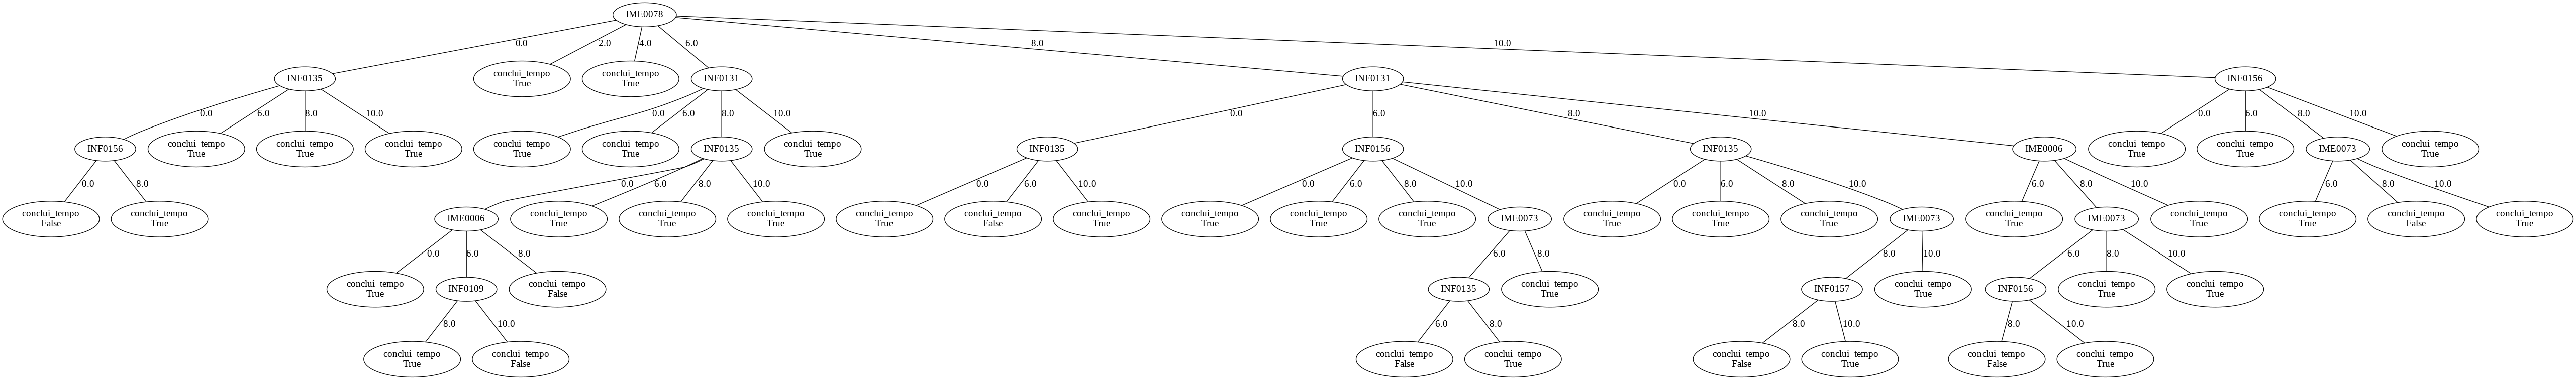


###########################################################
# Atributo Alvo: boa_media
# Treino: 96	Testes: 25
# 22 acertos e 3 erros
# Precisão de 88.0%
###########################################################



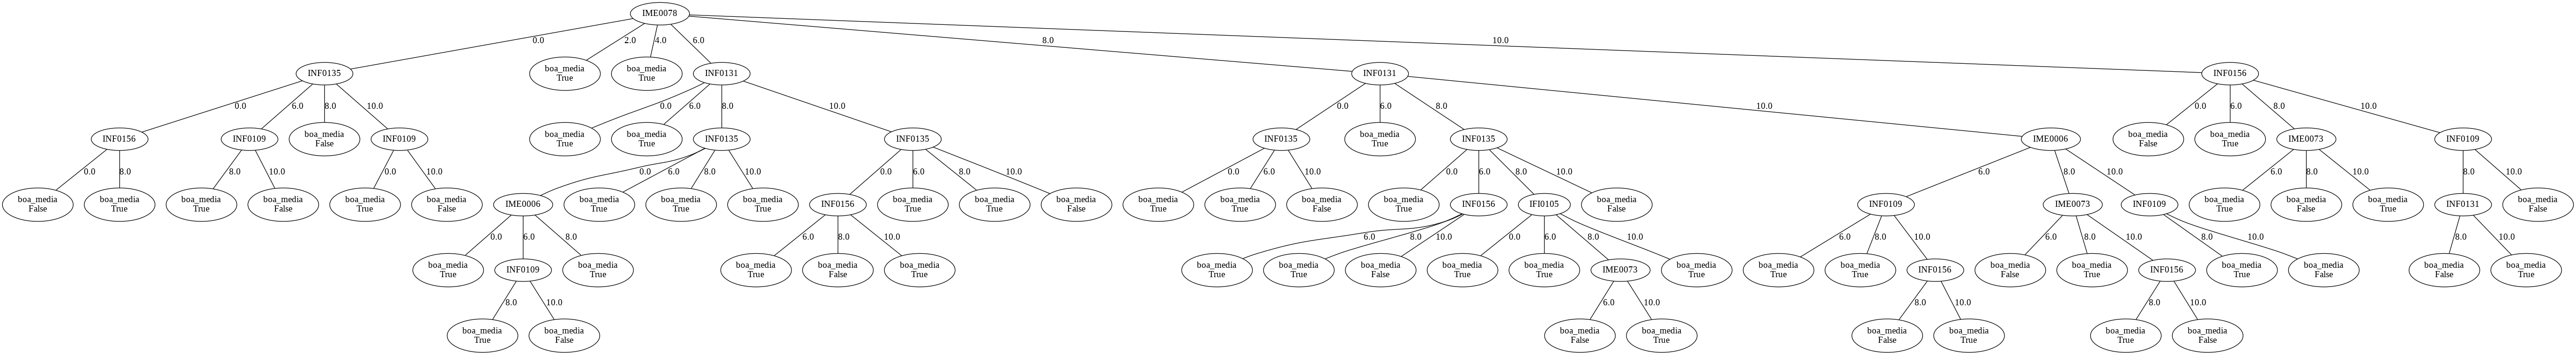

Error: valor 0.0 não encontrado nesta arvore.

###########################################################
# Atributo Alvo: poucas_reprovacoes
# Treino: 96	Testes: 25
# 19 acertos e 6 erros
# Precisão de 76.0%
###########################################################



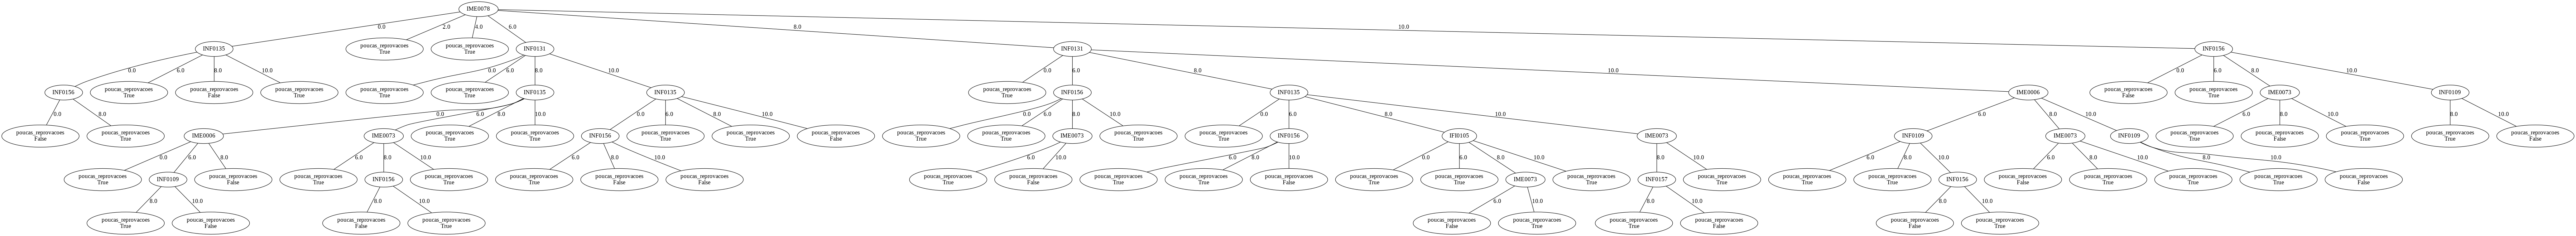

In [0]:
from sklearn.model_selection import train_test_split

atributosAlvo = ['conclui_tempo', 'boa_media', 'poucas_reprovacoes']
atributosAvaliados = ['IME0073','INF0109','INF0131','INF0135','INF0156','IFI0105','IME0006','IME0078','INF0157','INF0195']

train, test = train_test_split(alunos_nota, test_size=0.2)

for alvo in atributosAlvo:
    root = ArvoreID3(train, atributosAvaliados, alvo)

    acertos = 0
    for i, aluno in test.iterrows():
        if root.classificar(aluno) == aluno[alvo]:
            acertos += 1

    print("\n###########################################################")
    print("# Atributo Alvo: {}".format(alvo))
    print("# Treino: {}\tTestes: {}".format(len(train), len(test)))
    print("# {} acertos e {} erros".format(acertos, len(test) - acertos))
    print("# Precisão de {}%".format((acertos/len(test)*100)))
    print("###########################################################\n")
    
    root.plotar()

#Avaliação dos resultados

O algoritmo utilizado teve uma taxa de precisão de 88% para o atributo para concluir no tempo. 88% para quem conclui com boa média e 76% para poucas reprovações. 
De uma forma geral o modelo implementado teve um bom resultado para solução desse problema, levando em consideração as dicas dadas em sala de aula para tratar a base de dados que é um dos passos mais importantes para a resolução de um problema em Inteligência Artificial.